# Handwritten Digit Recognition Project 
# with Tensorflow and Raspberry Pi


* Report Created By: Yoda Daniel




### Kennesaw State University
### CPE 4903

# Table of Contents



### Project Overview
    - Project's Objective
    - Introduction to Convolutional Nueral Networks
    - CNN's Image Classification 


### Design
    - Parts List
    - Software Application List
    - Software Installation


### The Software Code
    - The CNN Model
    - Testing of the Model


### Analysis and Conclusion
    - Analyzing images
    - Conclusion
    - References

# **Project Overview**



## Project Objective
#### - Creating a handwritten digit recognition systen with a Raspberry PI and Pi camera module. The recognition will be done using Convelutionel Nueral Networks in Tensorflow and Keras. The objectives are as stands:
    1. Have standalone training and inference done on the Raspberry Pi system
    2. Handwritten Digit written in black on a white background
    3. Digit Recognized by system shall be displayed on the SenseHat LED panel extension


## Introduction to Convolutional Nueral Networks

### What are Convolutional Nueral Nets used for?
- CNN's are commonly used for image and video recognition, image and video classification, and natural language processing. In this project, we utilize the CNN's ability to classify images.

### How do humans classify images?
- Humans identify characteritstics of what we are looking at and our brain makes inferences based on what it already knows. An example is how we identify a cat. Does what our eyes are looking at have sharp ears, a long tail, whiskers, and small slitted eyes? Yes to all, then it is a cat.



### How do CNN's for image classification?
- Convultional Nueral Networks are made up of convultional layers. A convultion is an application of a "filter" over a piece of the image input. The application is repeated with the same filter until whole image is computed and the output creats a "feature map." The feature map is what the CNN recognizes as patterns or characteristics within the image, similar to how humans classify images. Below is an example of the number 9 being convulted to extract features. 

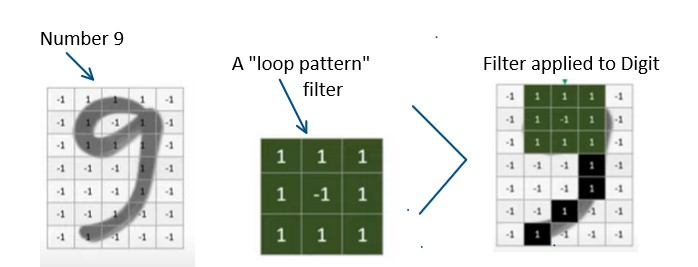

- Here is the convolution process, done one time showing the mathematical function

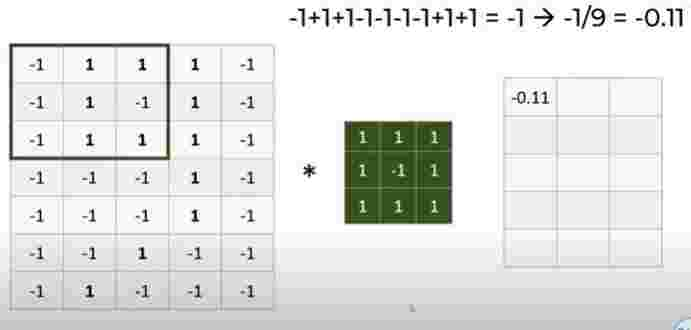




- and twice more to show how the filter's movement covers the whole image. 
inster twofilter
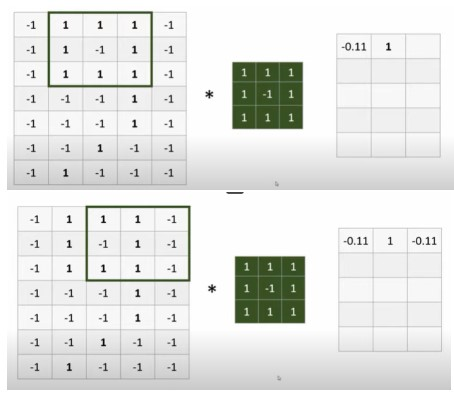

 
- There are two classifications of features,low and high level features. High level meaning very distint such as a cat's ears, eyes or nose. Low level faetures are more somple like the curve of a cat's ears or the outline of the cat's mouth. These low and high level features make up the overall feature map that helps the CNN determine the overeall output, which is the classifying what the image is. 


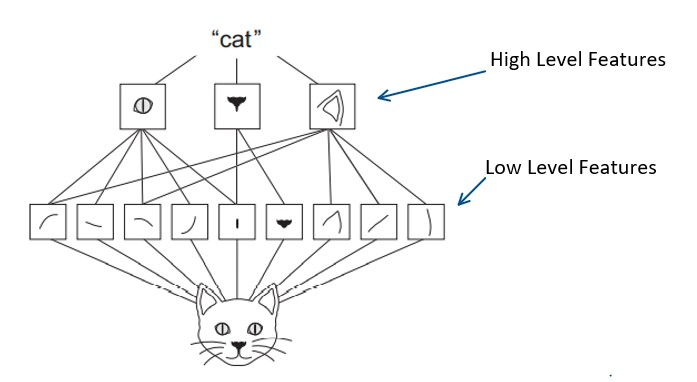


### How do CNN's differ from a standard Nueral Network for image classification?
- The patterns or "filters" used in Convulutional Nueral Networks can be applied to any part of an image. Using the "loop pattern" filter seen previously, we can see here that it can be applied to any portion of the image, for any image. Therefore the same "loop pattern" filter can be used for the digit 6.


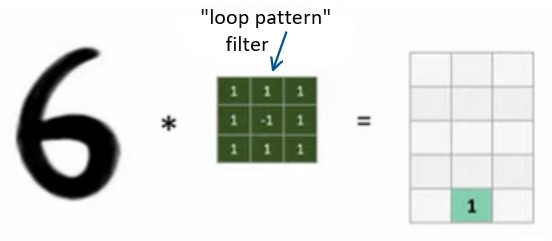

# Design

##      **Parts List**
- Raspberry Pi 4
- Rasperrby Pi Camera Module V2
- Rasperrby Pi SenseHat LED panel
- 64 GB Micro-SD card
- USB-C charger

##      **Software Applications List**
- Python3
- Tensorflow, Keras, OpenCV
- Virtual Network Computing, VNC by RealVNC
- WinSCP ( file transfer )

Software Installation
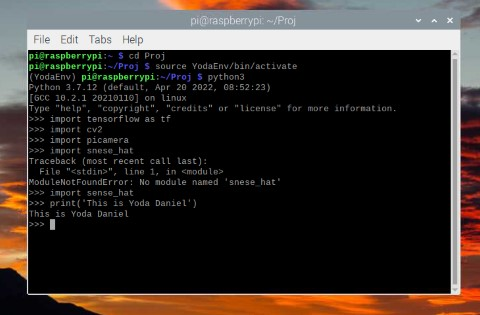

# The Software Code

- An overall of two programs were used in this project, named "testcode.py" and "keras_conv-net.py"
- Using VNC, the code could be editied and ran from the confort of our personal laptops. The winscp file transfer was used to transfer files between the devices. 


# Keras_con-net.py - The CNN Model

- The task of this program is to create our Convolutional Nueral Network model and save it for later use in the testcode.py. Below is a flowchart for this program along with the code completed with comments. 

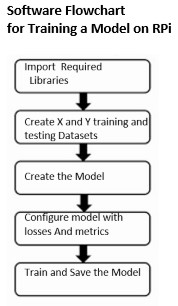

In [ ]:
#Import libraries used
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten 
import matplotlib.pyplot as plt

In [ ]:
# Creating our Traing and Testing Data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 

# We want our Training and Testing values between 0 to 1 so we scale accoringly
x_train = x_train.astype("float32") / 255 
x_test = x_test.astype("float32") / 255 


# Make sure images have shape (28, 28, 1) 
x_train = np.expand_dims(x_train, -1) 
x_test = np.expand_dims(x_test, -1) 
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

#Here we assign how many classes we have for our data
# We are dealing with digits 0 through 9 therefore 10 classes are need
y_train = keras.utils.to_categorical(y_train, num_classes) 
y_test = keras.utils.to_categorical(y_test, num_classes) 

#Here is printing of shapes to ensure they are adaquete for training
#print('Shape of x_train is {}'.format(x_train.shape))
#print('Shape of x_test is {}'.format(x_test.shape))
#print('Shape of y_train is {}'.format(y_train.shape))
#print('Shape of y_test is {}'.format(y_test.shape))


In [ ]:
#The construction of our model with 3 convolutional layers, 2 pooling layers
#A flatten layer, and two dense layers, the final layer being the output layer
#The last layer has 10 output units becuase we want 10 different classes 0 through 9 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
#Compiling the model, using catagorical crossentropy and the Adam optimizer
#Then use the model.summary, a useful function that shows us the details of our model
#There we can see the shapes of the layers, the parameters used in the layers, and the total. 

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())
history = model.fit(x_train,y_train,epochs=5,batch_size=200,validation_split=.2,verbose=1)

#### Here is a sucessful Model sumary from the Rasperberry Pi

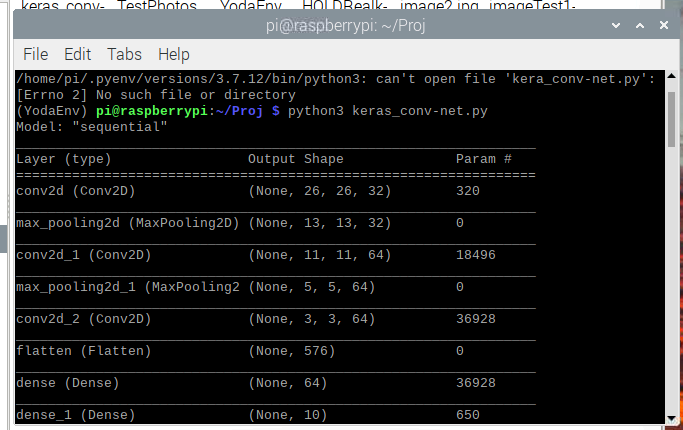

In [ ]:
#Save the model evaluation under the variable score
#The first index of the score variable is our Testing loss percentage of the model
#The second index of the score variable is the Accuracy of our model on the Testing data
#Print both those varaibles then save the overall model for later use in our "testcode.py"
score= model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 
model.save('/home/pi/Proj/keras_convnet_adam') 

### Here is the Training of the model happening on the Raspberry Pi
- The Testing loss and Testing Accuracy is printed

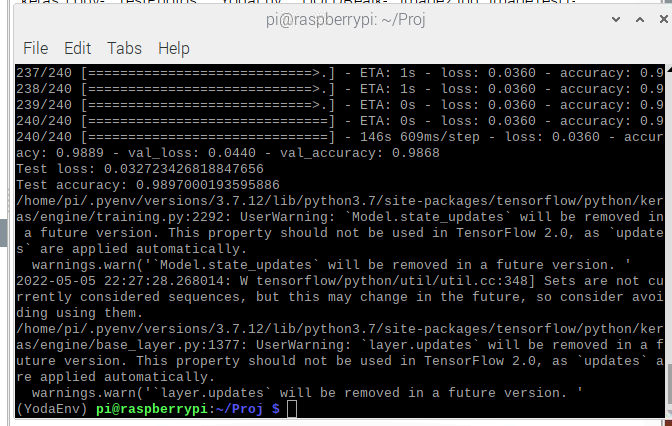

In [ ]:
#------------------------------------------------------------------------------------------------

# testcode.py - Testing our Model

- This program task is to call upon the Camera module and take a picture of the Handwritten digit
- The image is saved into a file that is then converted into readable data for the Convolutional Nueral Network model
- The model is previoulsy trained and saved in another file and will be loaded into this program at the start
- Once the model is done, It will produce an array of values that are probabilites of what the model thinks the digit is.
- Therefore, we read the highest proability which is the models prediction

Below is a flowchart for this program along with the code completed with comments. 

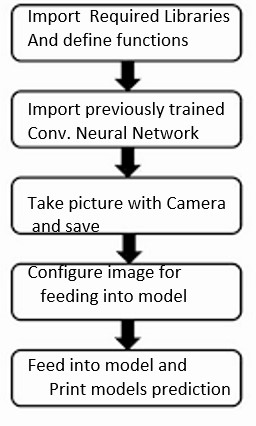

In [ ]:
#Inporting Libraries used
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sense_hat import SenseHat
import time
import picamera
import cv2
sense=SenseHat()

#Parameters for resizing image
row=28
colomn=28

#define read_image to read file
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (row, colomn),interpolation=cv2.INTER_CUBIC)
#return cv2.resize(img, (ROWS, COLOMNS),interpolation=cv2.INTER_CUBIC)

#define invert to invert image color
def invert(file_path):
    return cv2.bitwise_not(file_path)

#Import the previously saved Convulutional Nueral Network model named "keras_convnet_adam"
model = keras.models.load_model("/home/pi/Proj/keras_convnet_adam")#Location of model


#Capture an image with the Pi camera and name the file "imageTest1". 
#You can find the Image in the Proj directory to see that number is fully inframe

while(1): 
    with picamera.PiCamera() as camera:
        camera.resolution = (1024, 768)
        camera.capture('imageTest1.jpg')
    file = "imageTest1.jpg"
    test_image = read_image(file)
    
    #Our model is trained with number that use a Black background and white numbers
    #Therefore we must minipulate the image taken to match the format
    #First Convert image to greyscale then invert it, use .cvtColor and apply it to the image
    #Then use the previously define function invert to invert the greyscale image
    
    gray= cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    invert_img= invert(gray)
    
    
    #Reshaping is important part of setting up Nueral Networks correctly. 
    #Here we are reshaping the image then feeding it into the model
    
    X_img = invert_img.reshape(1,28,28,1)/255
    Yhat = model.predict(X_img)
    print('Yhat:',Yhat)
    
    #Now we need to find the highest accuracy in the Yhat array 
    #The digit with the highest accuracy is therefore the model's prediction
    max = 0
    for i in range (10):
        if(Yhat[0,i]> max):
            max = Yhat[0,i]
            maxPos= i
    #Display the digit to the Sensehat    
    digit= str(maxPos)
    sense.show_letter(digit)
    
    #Print the Yhat array aswell at the Digit prediction in the terminal
    print('Accuracy:{}'.format(Yhat[0,maxPos]*100))
    print('Digit:{}'.format(digit))
    
    #Wait for five miliseconds before taking another picture
    cv2.waitKey(5)
    



##  Analysis and Conclusion
- Here is the digit 1 being predicited with an accuracy of 48.9%.

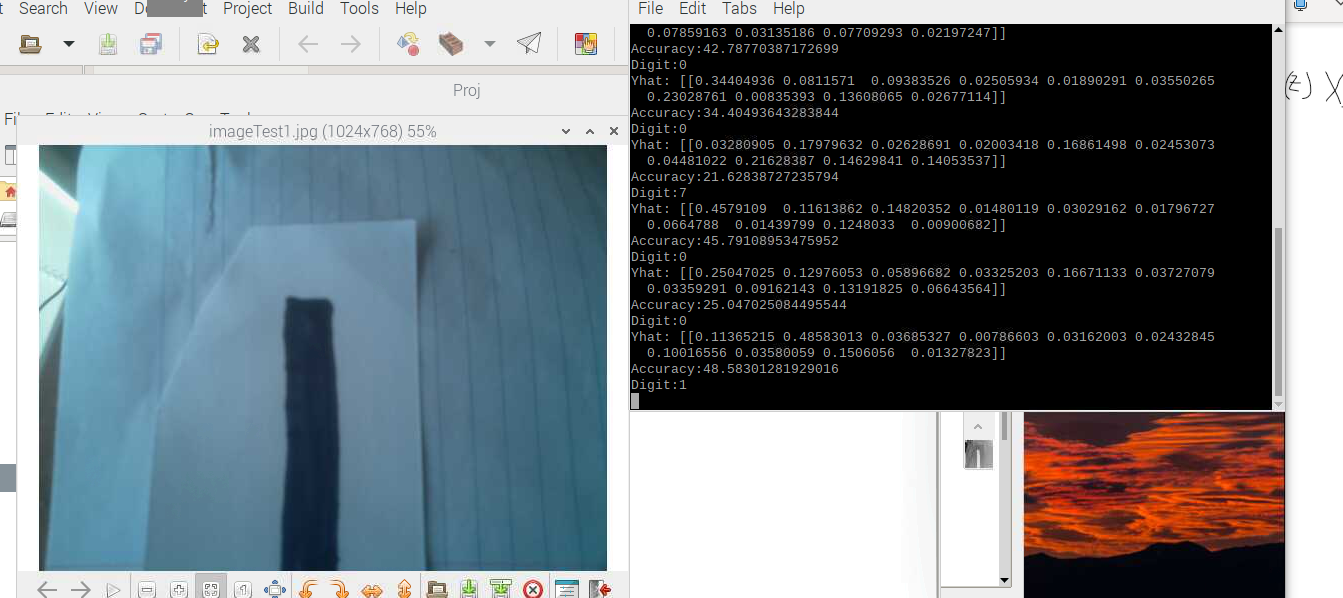

- These are generally low values for accuracy predicitons so I amied for higher. 
- I found through testing that the lighting of the digit is very importnat for the accuracy of the prediciton.
- I tried first with just my phone light and got slight improvements to predicitions.


- An example is that previous I predicited the digit 3 with test accuracy of 48% but when adding a phone light the accuracy increaed to 50%, a slight increae.

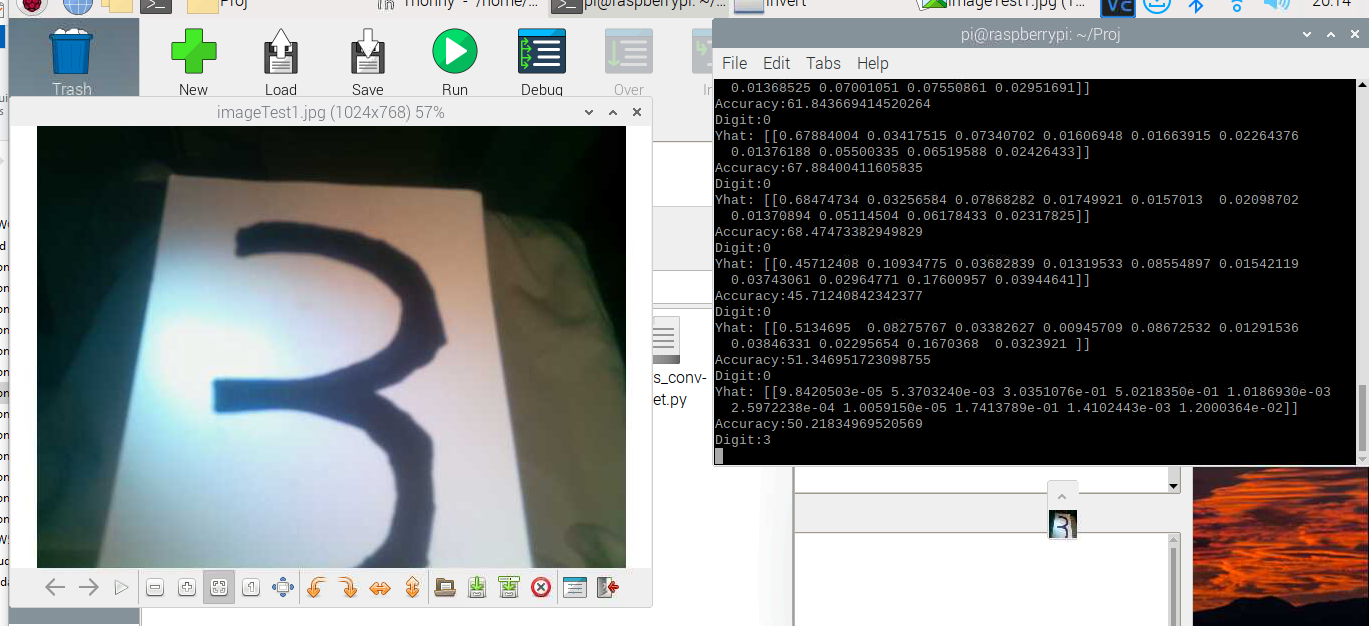

- Once I found that lighting was important, I created an environemnt for reading the handwritten digits surronded by an LED strip.
- The led strip is surrounding the digit but out of sight from camera so it does not interfere.
- Here is an image of the enironment

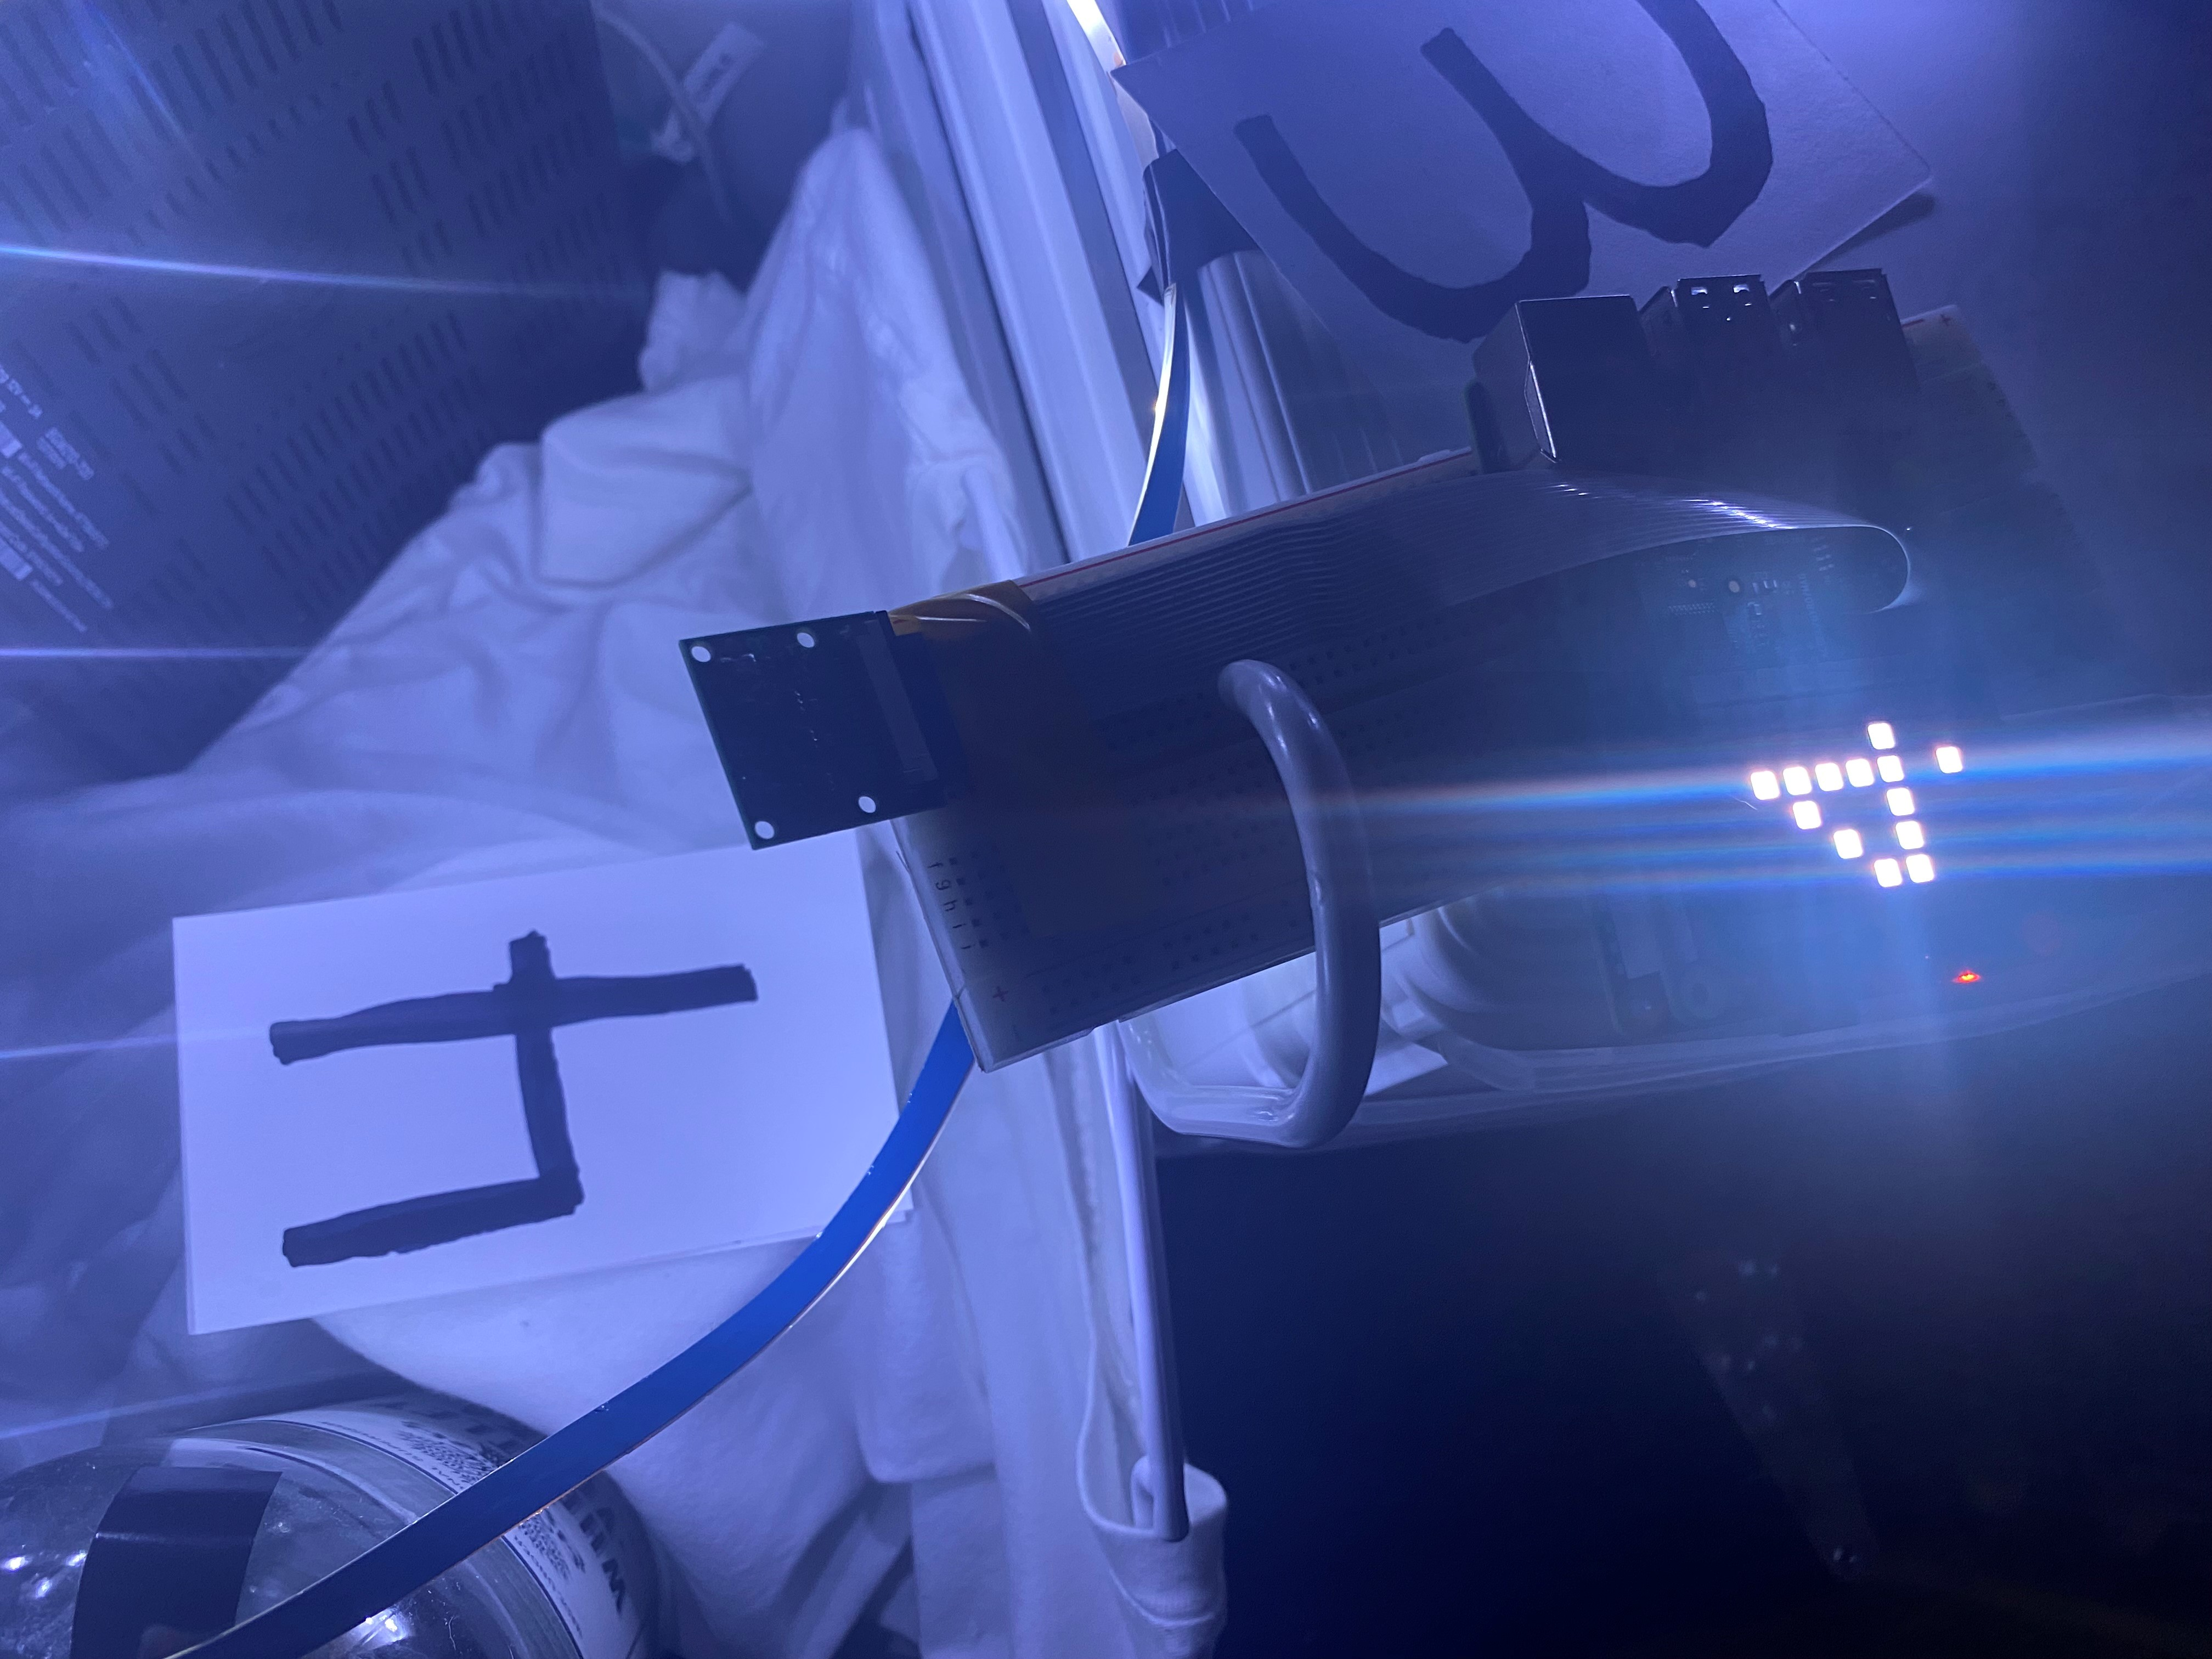

- There was a vast improvement in the accuracy of the model's prediction after this was done. 
- Previous I was reading the digit 4 at around 50 percent but it improved to 64% shown below.

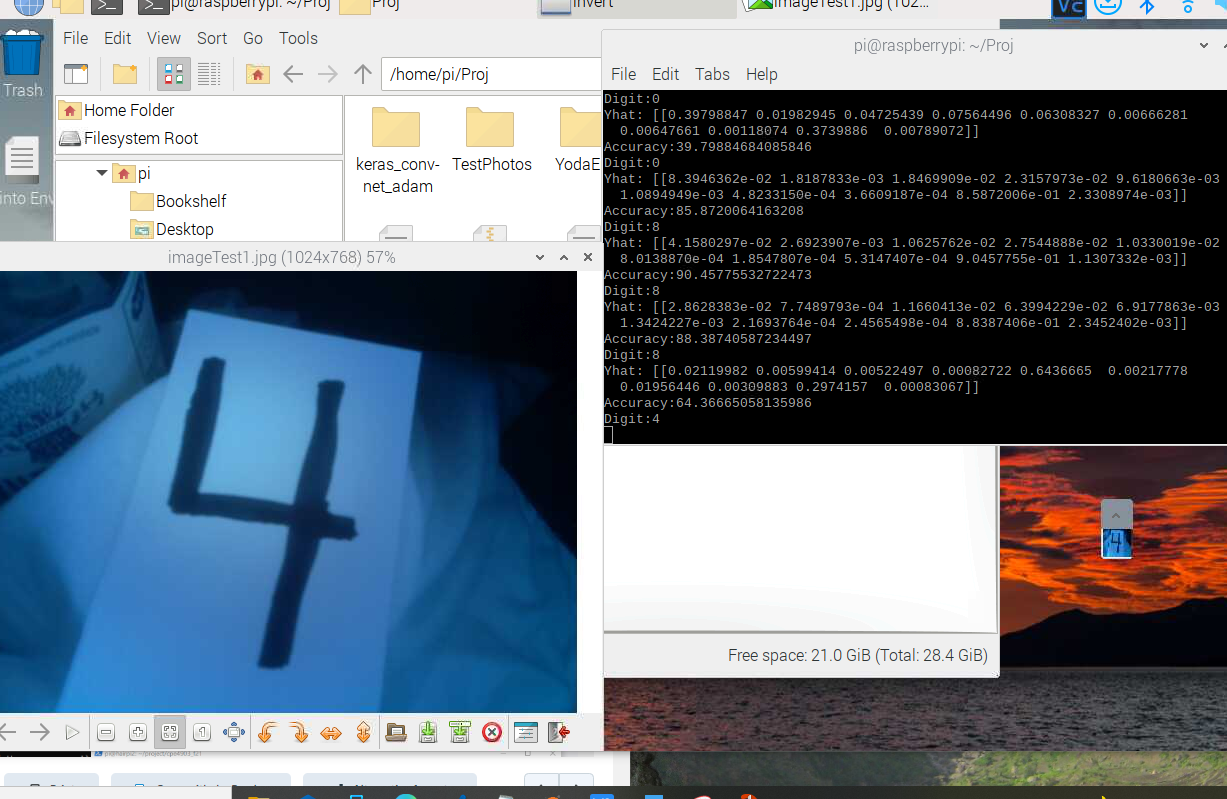

### Conclusion:

- In conclusion, we have built a device with training and inference done standalone that reads handwritten digits written in black on a white background. The prediction is then displayed on the device, all done by utilizing the power of Convolution and Convolutional Nueral Networks. 

- The video attached shows the device recognitizing the digits 1, 4, 0 and 8 aswell as displaying the digit on the LED panel. 

### References:

- https://www.youtube.com/watch?v=zfiSAzpy9NMv
- Dr. Hai Ho's Convolutional Nueral Network Lecture Slides